<a href="https://colab.research.google.com/github/fowardelcac/Abandono-Escolar/blob/main/Notebooks/Modelado_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/fowardelcac/Abandono-Escolar.git

Cloning into 'Abandono-Escolar'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 90 (delta 29), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (90/90), 1.08 MiB | 6.53 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [3]:
dataset_original = pd.read_csv('https://raw.githubusercontent.com/fowardelcac/Abandono-Escolar/main/Dataset/dataset.csv')
df_editado = pd.read_csv('https://raw.githubusercontent.com/fowardelcac/Abandono-Escolar/main/Dataset/D2/df.csv').drop('Unnamed: 0', axis = 1)

In [4]:
def split(df):
  X = df.drop('Target', axis = 1)
  y = df.Target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
  return X_train, X_test, y_train, y_test

In [5]:
def metricas(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [6]:
def modelar(X_train, X_test, y_train, y_test):
  resultados = {}
  modelos_l = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(max_iter = 1000), KNeighborsClassifier(),  XGBClassifier()]
  for i in modelos_l:
    modelo = i.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados[str(i)] = (metricas(y_test, y_pred))
  return resultados

In [7]:
df_editado.head()

,Marital status,attendance,Esn,Debtor,fees,Gender,scholarship,Target,Sector_Agronomy and Veterinary Science,Sector_Business and Communication,...,Age at enrollment,Unemployment rate,Inflation rate,GDP,Enrolled1,Approved1,Enrolled2,Approved2,Tasa_1st,Tasa_2nd
0,0,1,0,0,1,1,0,0,0,0,...,20,10.8,1.4,1.74,0,0,0,0,0.000000,0.000000
1,0,1,0,0,0,1,0,1,0,0,...,19,13.9,-0.3,0.79,6,6,6,6,100.000000,100.000000
2,0,1,0,0,0,1,0,0,0,1,...,19,10.8,1.4,1.74,6,0,6,0,0.000000,0.000000
3,0,1,0,0,1,0,0,1,0,1,...,20,9.4,-0.8,-3.12,6,6,6,5,100.000000,83.333333
4,1,0,0,0,1,0,0,1,0,0,...,45,13.9,-0.3,0.79,6,5,6,6,83.333333,100.000000


In [8]:
df_edit2 = df_editado.filter(['Gender','scholarship', 'Target', 'Sector_Agronomy and Veterinary Science',
                       'Sector_Business and Communication', 'Sector_Education', 'Sector_Renewable Energies', 'Sector_Social Services and Health',
                       'Sector_Technology and Design', 'Sector_Tourism', 'Age at enrollment', 'Tasa_1st', 'Tasa_2nd'], axis = 1)
df_edit22 = df_edit2[df_edit2.Target != 2]
scaler = StandardScaler()
colum_s= ['Age at enrollment', 'Tasa_1st', 'Tasa_2nd']
df_edit22_s = df_edit22.copy()
df_edit22_s[colum_s] = scaler.fit_transform(df_edit22[colum_s])
df_edit22_s.head()

,Gender,scholarship,Target,Sector_Agronomy and Veterinary Science,Sector_Business and Communication,Sector_Education,Sector_Renewable Energies,Sector_Social Services and Health,Sector_Technology and Design,Sector_Tourism,Age at enrollment,Tasa_1st,Tasa_2nd
0,1,0,0,0,0,0,0,0,1,0,-0.442212,-1.851221,-1.655320
1,1,0,1,0,0,0,0,0,0,1,-0.569976,0.793510,0.842316
2,1,0,0,0,1,0,0,0,0,0,-0.569976,-1.851221,-1.655320
3,0,0,1,0,1,0,0,0,0,0,-0.442212,0.793510,0.426044
4,0,0,1,0,0,0,0,1,0,0,2.751894,0.352721,0.842316


## Age at enrollment	Tasa_1st	Tasa_2nd estandarizados

In [9]:
X_train, X_test, y_train, y_test = split(df_edit22_s)
modelar(X_train, X_test, y_train, y_test)

{'DecisionTreeClassifier()': (0.8634730538922155, 0.8953488372093024),
 'RandomForestClassifier()': (0.8826347305389222, 0.9),
 'LogisticRegression(max_iter=1000)': (0.8850299401197604, 0.8872727272727273),
 'KNeighborsClassifier()': (0.888622754491018, 0.8892921960072595),
 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n              num

# Carreras codificadas con one hot encoder, en vez de ser dividas artificialmente por mi

In [10]:
data_3 = df_editado.filter(['Gender','scholarship', 'Target',  'Age at enrollment', 'Tasa_1st', 'Tasa_2nd'], axis = 1)
data_3['Course'] = dataset_original.Course
data_3 = data_3[data_3.Target != 2].copy()
one_hot_encoded_data = pd.get_dummies(data_3, columns = ['Course'])
one_hot_encoded_data.head()

,Gender,scholarship,Target,Age at enrollment,Tasa_1st,Tasa_2nd,Course_1,Course_2,Course_3,Course_4,...,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Course_17
0,1,0,0,20,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,19,100.000000,100.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,19,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,20,100.000000,83.333333,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,45,83.333333,100.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = split(one_hot_encoded_data)
modelar(X_train, X_test, y_train, y_test)

{'DecisionTreeClassifier()': (0.8694610778443114, 0.9025341130604289),
 'RandomForestClassifier()': (0.8874251497005988, 0.9099616858237548),
 'LogisticRegression(max_iter=1000)': (0.8922155688622755, 0.8985239852398524),
 'KNeighborsClassifier()': (0.881437125748503, 0.9013282732447818),
 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n  

# Mismo que el anterior pero estandarizado

In [12]:
scaler = StandardScaler()
colum_s= ['Age at enrollment', 'Tasa_1st', 'Tasa_2nd']
one_hot_encoded_data = one_hot_encoded_data.copy()
one_hot_encoded_data[colum_s] = scaler.fit_transform(one_hot_encoded_data[colum_s])

In [13]:
X_train, X_test, y_train, y_test = split(one_hot_encoded_data)
modelar(X_train, X_test, y_train, y_test)

{'DecisionTreeClassifier()': (0.8718562874251496, 0.9060665362035225),
 'RandomForestClassifier()': (0.8850299401197604, 0.9080459770114943),
 'LogisticRegression(max_iter=1000)': (0.8934131736526946, 0.8987108655616943),
 'KNeighborsClassifier()': (0.8862275449101796, 0.8846846846846846),
 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n 

# PCA

In [14]:
one_hot_encoded_data.drop('Target', axis = 1, inplace = True)
pca = PCA(n_components = 2)
pca.fit(one_hot_encoded_data)
data_transf = pca.transform(one_hot_encoded_data)
data_transf.shape

(3630, 2)

In [15]:
df_final = pd.DataFrame({'PCA1': data_transf[:, 0],
                         'PCA2': data_transf[:, 1],
                         'Target': data_3.Target
                         })

<Axes: xlabel='columnas', ylabel='var'>

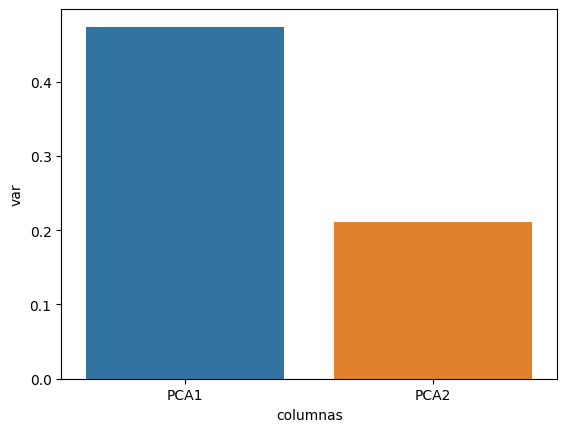

In [16]:
var_pca = pd.DataFrame({
    'columnas': ['PCA1', 'PCA2'],
    'var': pca.explained_variance_ratio_
})
sns.barplot(data = var_pca, x = 'columnas', y = 'var')

In [17]:
X_train, X_test, y_train, y_test = split(df_final)
modelar(X_train, X_test, y_train, y_test)

{'DecisionTreeClassifier()': (0.8526946107784431, 0.8919449901768173),
 'RandomForestClassifier()': (0.8790419161676647, 0.900952380952381),
 'LogisticRegression(max_iter=1000)': (0.8790419161676647, 0.8648180242634316),
 'KNeighborsClassifier()': (0.8970059880239521, 0.916030534351145),
 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, device=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              multi_strategy=None, n_estimators=None, n_jobs=None,\n   